In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class votePop:
    
    def __init__(self,n=1000,center=None,cov=None):
        self.N = n
        if center is None:
            self.center = [0,0]
        else:
            self.center = center

        if cov is None:
            self.cov = [[1000,0],[0,1000]]
        else:
            self.cov = cov

        self.voters = np.random.multivariate_normal(self.center,self.cov,self.N)
        
    def show(self):
        x,y = self.voters.T
        plt.plot(x,y,'x')
        plt.axis('equal')
        plt.show()


In [3]:
class candidate:
    
    def __init__(self,pos=None):
        if pos is None:
            self.pos = np.array([0,0])
        else:
            self.pos = np.array(pos)
        self.votes = None

In [4]:
def election(population, candidates, method=None):
    if method is None:
        method = 'plurality'
    
    
    positions = np.array([c.pos for c in candidates])
    for c in candidates:
        c.votes=0
    voters = population.voters
    
    if method is 'plurality':
        for voter in voters:
            distances = np.linalg.norm(positions - voter, axis=-1) #along rows
            candidates[np.argmin(distances)].votes += 1
            
    return np.argmax([c.votes for c in candidates])

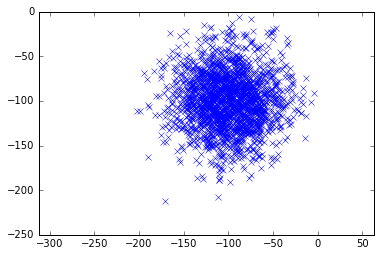

0

In [5]:
c1 = candidate()
c2 = candidate([1,1])
pop = votePop(n=2000,center=[-100.5,-100])
pop.show()
election(pop,[c1,c2])

In [6]:
def electionSweep(candidates, size=None, xres=50, yres=None , n=1000): #TODO:refactor with kwargs later
    if size is None:
        size = [[-1000,1000],[-1000,1000]]
    [[xmin,xmax],[ymin,ymax]] = size
    
    if yres is None:
        yres = xres
    
    xs, ys = (np.linspace(xmin, xmax, num=xres), np.linspace(ymin, ymax, num=yres))
    
#     res = np.fromfunction(lambda x,y: election(votePop(n,center=[x,y])),((xmax-xmin) // xstep, (ymax-ymin) // ystep))
    res = np.zeros( ((xmax-xmin)//xstep, (ymax-ymin)//ystep) )
    for x in range(xmin, xmax, xstep):
        for y in range(ymin, ymax, ystep):
            pop = votePop(n,center=[x,y])
            res[x//xstep,y//ystep] = election(pop, candidates)
                    
    return res

In [7]:
c1 = candidate([0,0])
c2 = candidate([200,200])
c3 = candidate([-200,-200])

In [8]:
a = electionSweep([c1,c2,c3])


In [9]:
b = np.repeat(np.repeat(a,50, axis=0), 50, axis=1)

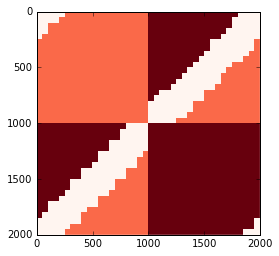

In [11]:
plt.imshow(b, interpolation='none', cmap='Reds')
plt.grid(False)